##붓꽃 데이터 읽어와서 확인



###(1) 붓꽃 데이터를 가져오기 위해 csv 파일을 읽어오고, 처음 5줄 데이터를 출력하여 필요 데이터를 확인한다. -> .head() 사용

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/데이터 분석 스터디/전처리_시각화_자료/6장/iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


###(2) 데이터 전체적인 구조를 확인.

info() 함수는 데이터프레임의 기본 정보를 보여준다.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


###(3) 데이터 기초 통계량을 확인.

describe() 함수는 150개 샘플의 평균값, 표준편차, 최솟값, 최댓값 등 통계 정보를 요약한다.

In [ ]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


###(4) value_counts()를 적용하여 품종별 데이터 개수를 구한다.

In [ ]:
count = pd.DataFrame(df['Species'].value_counts())
count

,count
Species,
setosa,50
versicolor,50
virginica,50


##붓꽃 데이터 전처리

결측 데이터와 중복 데이터를 확인하고 처리하는 방법

###(1) 결측치 확인하기

데이터프레임에 isnull()을 적용하면, 각 원소가 결측값(null)인지 아닌지 체크. -> 결측값이면 True, 정상 데이터면 False를 반환.

이 상태에서 sum()을 적용하면, 각 열의 결측값의 개수를 계산해 준다.

In [ ]:
df.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

###(2) 중복 데이터 확인하기

데이터프레임에 duplicated()를 적용하면 동일한 샘플이 중복되어 존재하는지 체크. -> 중복되면 True, 아니면 False를 반환.

In [ ]:
index = df.duplicated()   #중복된 항을 찾아내어 각 행에 대해 중복 여부를 나타내는 불리언 시리즈 생성. 1 ~ 150 개의 bool 값이 나옴.

df.loc[index, :]     #이 불리언 시리즈를 사용하여 중복된 행들을 데이터프레임에서 선택. -> 중복된 행들만 따로 추출할 수 있음
#loc : 행과 열을 선택할 때 사용하는 인덱싱 방법 중 하나. 행과 열의 라벨 (인덱스)를 기반으로 데이터 선택 가능
#ex) df.loc[0 , 'column_name' ] : 0번째 행의 'column_name' 열을 선택하는 것.
#위의 코드에서는 index 행의 모든 열을 나타내라는 뜻.

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
142,5.8,2.7,5.1,1.9,virginica


###(3) 중복 데이터를 모두 확인하기

앞서 142번이 중복됨을 확인했으므로, 이와 같은 값을 가지고 있는 행이 무엇인지 찾기

In [ ]:
result = (df['SepalLength'] == 5.8) & (df['PetalWidth'] == 1.9)
df.loc[result, :]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


다른 방식으로 찾기

In [ ]:
#index 142 행의 값을 가져오기
row = df.loc[142, :]

#모든 열의 값이 row와 동일한 행 찾기
result = (df == row).all(axis=1)
#df == row -> 각 행의 모든 열 값이 row와 동일한지 bool 값으로. (True)
#.all(axis=1) -> 각 행에 대해 모든 열(axis=1)의 값이 True인지 확인하는 함수.
df.loc[result, :]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


###(4) 중복 데이터 삭제하기

중복 데이터에서 단일한 1개의 키만 남기고 drop_duplibcates()를 이용하여 나머지 중복 데이터를 제거한다.

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

##붓꽃 데이터 그룹핑

In [ ]:
count = pd.DataFrame(df['Species'].value_counts())
count

#실제로 실행해보면 duplicated가 삭제되었으므로 위에서 똑같은 코드를 실행했을때와는 다른 결과가 나옴을 확인

,count
Species,
setosa,50
versicolor,50
virginica,49


'품종' 열을 기준으로 합계 구하기

In [ ]:
df.groupby('Species').sum()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,323.6,146.0,272.5,99.4


'품종'열을 기준으로 평균 구하기

In [ ]:
df.groupby('Species').mean()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


sklearn(사이킷런) 패키지에서 붓꽃 데이터 셋 불러오기

In [ ]:
from sklearn.datasets import load_iris
df_dataset = load_iris()   ##사이킷런에 자체적으로 iris 데이터셋이 있다는 소리.
df_dataset.keys()  #키값들

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
df_dataset = pd.DataFrame(df_dataset['data'], columns = df_dataset['feature_names'])
df_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


seaborn(시본) 모듈도 iris 데이터 셋을 내장하고 있다.

In [ ]:
import seaborn as sns
df_iris = sns.load_dataset('iris')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##판다스의 데이터 시각화


판다스의 시리즈나 데이터프레임은 'plot'이라는 시각화 메소드를 내장하고 있다.

plot은 matplotlib을 내부에서 임포트하여 사용한다. plot 메소드의 kind라는 인수를 바꾸면 어려가지 plot을 기릴 수 있다.

###(1) 막대 그래프 그리기

수직 막대 그래프는 kind = 'bar' 옵션을 통해 구현된다.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48155 (\N{HANGUL SYLLABLE BAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52840 (\N{HANGUL SYLLABLE CIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

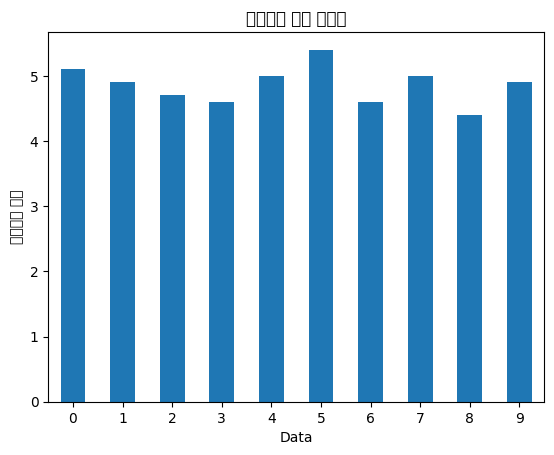

In [ ]:
import matplotlib.pyplot as plt

df.SepalLength[:10].plot(kind='bar', rot=0)
plt.title("꽃받침의 길이 시각화")
plt.xlabel('Data')
plt.ylabel('꽃받침의 길이')
plt.show()

붓꽃 종류별 꽃 받침 길이의 평균에 대한 시각화

In [ ]:
df2 = df.groupby(df['Species']).mean()
df2

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48155 (\N{HANGUL SYLLABLE BAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52840 (\N{HANGUL SYLLABLE CIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

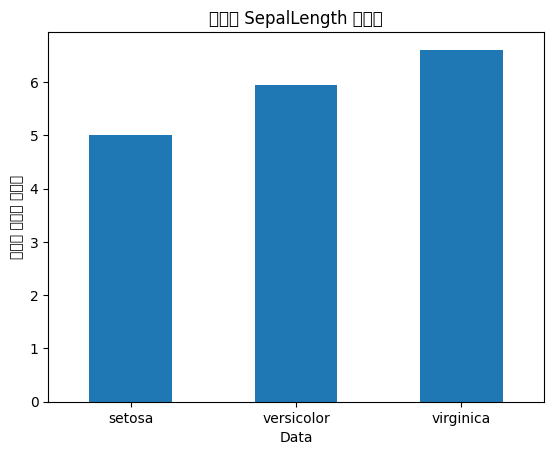

In [ ]:
df2.SepalLength[:].plot(kind='bar', rot=0)    #df2.SepalLength 열 전체를 선택.
plt.title("품종별 SepalLength 그래프")
plt.xlabel('Data')
plt.ylabel('꽃받침 길이의 평균값')
plt.show()

###(2) 히스토그램 그래프 그리기

데이터 값을 일정 구간으로 나누고, 구간에 속하는 데이터의 개수를 막대 그래프 형태로 나타낸다.

kind = 'hist' 옵션 사용

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51669 (\N{HANGUL SYLLABLE JING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packa

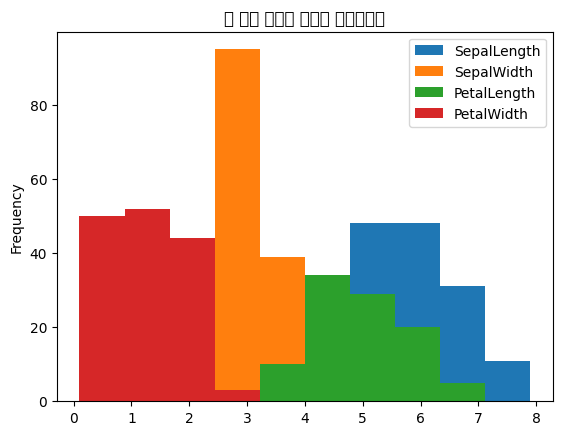

In [ ]:
df.plot(kind='hist')
plt.title('각 특징 값들의 빈도수 히스토그램')
plt.show()

###(3) 상자 그래프 그리기

사분위수 범위를 확인해 데이터의 분포 파악하고 이상치(Outlier) 유무를 확인할 때 사용할 수도 있다.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

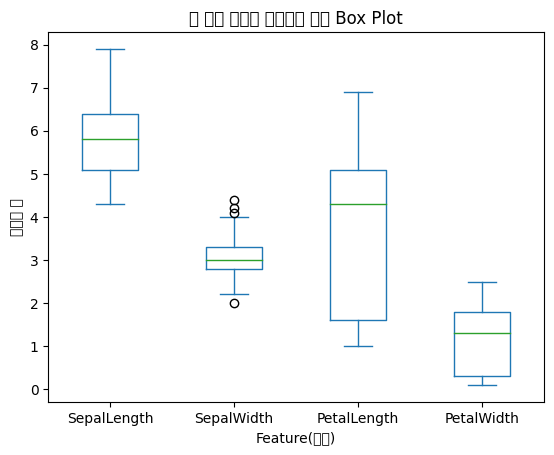

In [ ]:
df.plot(kind='box')
plt.title('각 특징 값들의 빈도수에 대한 Box Plot')
plt.xlabel('Feature(특징)')
plt.ylabel('데이터 값')
plt.show()

**Box Plot 분석 방법**

1. 중앙값(Median) :

  박스 내부의 가로선. 전체 데이터의 50%

2. 1사분위수(Q1) 및 3사분위수(Q3) :

  박스의 아래쪽 경계 -> 1사분위수(Q1) : 전체 데이터의 25%가 이 값보다 작다.

  박스의 위쪽 경계 -> 3사분위수(Q3) : 전체 데이터의 75%가 이 값보다 작다.

3. 사분위 범위 (Iterquartile Range, IQR) :

  박스의 높이는 사분위 범위. 사분위 범위는 Q3 - Q1의 차이이며 전체 데이터의 50%가 이 범위 안에 존재.

4. 최솟값 및 최댓값 :

  박스 아래의 수직선(whisker)은 최솟값과 최댓값을 나타냄. 단, 이때 최솟값과 최댓값 중 이상치(outlier)를 제외한 값들만 표시됨.

5. 이상치(Outlier) :

  박스 밖의 점들은 이상치를 나타냄. 이상치는 일반적으로 Q1 - 1.5 x IQR 보다 작거나 Q3 + 1.5 x IQR보다 큰 값들이다.

###(4) 산점도 그래프 그리기

산점도 그래프는 두 변수 간의 관계를 나타내는 그래프이다. 산점도 그래프는 kind = 'scatter' 옵션을 통해 구현된다.

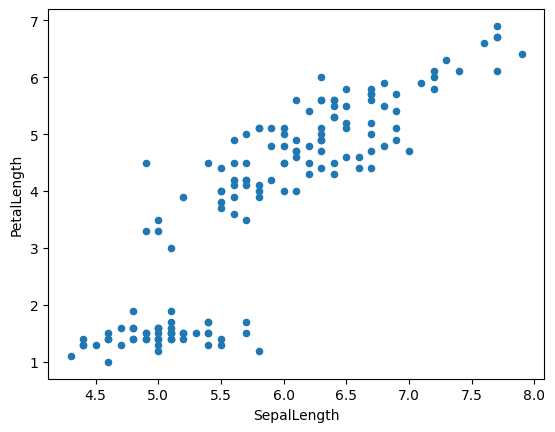

In [ ]:
df.plot(x='SepalLength', y='PetalLength', kind='scatter')
plt.show()